<a href="https://colab.research.google.com/github/bellatchen/Assignments/blob/main/Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bella Chen

Goal: Predict the PRICE based on the available features using a linear regression model.

All of the features and the target are continuous variables. 

In [142]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')



In [143]:
#mounting data
Boston_housing = "/content/drive/MyDrive/Coding Dojo/Data Sets/Boston_Housing_from_Sklearn.csv"
Boston_housing_df = pd.read_csv(Boston_housing)
Boston_housing_df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [144]:
#check for missing values and what data types are in each column
Boston_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [145]:
#check for duplicates
Boston_housing_df.duplicated().sum()

0

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.00,0.42,-0.22,0.35,0.29,0.46,-0.39
NOX,0.42,1.00,-0.30,0.73,0.19,0.59,-0.43
RM,-0.22,-0.30,1.00,-0.24,-0.36,-0.61,0.70
AGE,0.35,0.73,-0.24,1.00,0.26,0.60,-0.38
PTRATIO,0.29,0.19,-0.36,0.26,1.00,0.37,-0.51
LSTAT,0.46,0.59,-0.61,0.60,0.37,1.00,-0.74
PRICE,-0.39,-0.43,0.70,-0.38,-0.51,-0.74,1.00


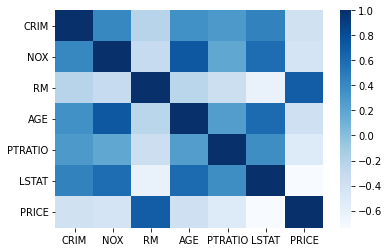

In [146]:
# An important exploration step is to determine if there are any moderate or strong correlations in your variables.
# 1) Make a heatmap of the correlations. 
# Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. 
# We will limit our analysis to these three features.

#heatmap for Correlation
corr = Boston_housing_df.corr()
print = sns.heatmap(corr, cmap = 'Blues')

Boston_housing_df.corr().round(2)

  RM (average number of rooms per dwelling) has a positive correlation with Price (0.70)

  LSTAT (% lower economic status of population) has a negative correlation with Price (-0.74)

  PTRatio ( pupil-teacher ratio by town) has a negative correlation with Price (-0.51)

          CRIM     per capita crime rate by town

          NOX      nitric oxides concentration (parts per 10 million)

          RM       average number of rooms per dwelling

          AGE      proportion of owner-occupied units built prior to 1940

          PTRATIO  pupil-teacher ratio by town

          LSTAT    % lower economic status of the population

          PRICE   Median value of owner-occupied homes in $1000's

In [147]:
#2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).
y = Boston_housing_df["PRICE"]
X = Boston_housing_df.drop(["PRICE", "AGE", "CRIM", "NOX"], axis = 1)

In [148]:
#3) Split your data into train and test groups. Please use random number 42 for consistency!

X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42)

In [149]:
#4) Instantiate your model and fit it on the training set.
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [150]:
#5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

r2_train
r2_test

0.6331590458194678

There is a slight difference between model performance on the training data (0.68) and the testing data (0.63).

In [151]:
#6) Evaluate your model using mean absolute error (MAE).

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mae_train
mae_test

3.3918448293813976

In [152]:
#7) Evaluate your model using mean squared error (MSE).  

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

mse_train
mse_test

25.688824196675952

In [155]:
#8) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

rmse_train
rmse_test

5.068414367104958